# problem1

In [1]:
# ML課題
# (1)
import numpy as np

In [2]:
def function(xx, ww):
    # ww is numpy matrix
    return 2 * (np.dot(ww, xx) > 0) - 1


In [3]:
def J(xx, y, ww, lam):
    res = 0
    for i in range(n):
        res = np.log(1+np.exp(-y[i]*np.dot(ww,xx[i])))
    res += lam * np.dot(ww, ww)
    return res

In [4]:
# dataset
def make_dataset(n):
    x = 3 * (np.random.rand(n,4) - 0.5)
    y = (2 * x[:,0] - 1 * x[:,2] + 0.5 + 0.5*np.random.randn(1,n)) > 0
    y = 2 * y - 1
    y = y.T
    return x, y

In [44]:
# optimize algorithm1
def gradient(xx, y, ww, lam):
    res = 0
    for i in range(n):
        res += -y[i]*xx[i]*np.exp(-y[i]*np.dot(ww, xx[i])) / (1+np.exp(-y[i]*np.dot(ww, xx[i])))
    res += 2*lam*ww
    return res


# optimize algorithm2
def newton(xx, y, ww, lam):
    res = 0
    for i in range(n):
        tmp = -y[i] * xx[i] * np.exp(-y[i]*np.dot(ww,xx[i]))
        
        tmp *= -y[i]**2 * np.dot(xx[i],xx[i]) * np.exp(-y[i]*np.dot(ww,xx[i]))
        tmp *= (1 + np.exp(-y[i]*np.dot(ww,xx[i])))
        
        tmp2 = (-y[i] * xx[i] * np.exp(-y[i]*np.dot(ww,xx[i])))**2
        tmp2 *= (1 + np.exp(-y[i]*np.dot(ww,xx[i])))
        
        tmp3 = (1 + np.exp(-y[i]*np.dot(ww,xx[i])))**2
        
            
        res += (tmp-tmp2) / tmp3
        
    res += 2*lam
    res /= n
    
#     print(res)
    return res


def optimizer(num, xx, y, ww, lam, eta):
    if num == 0:
        grad = gradient(xx, y, ww, lam)
    if num == 1:
        grad = newton(xx, y, ww, lam)
#     print(ww)
    ww = ww - eta*grad
    return ww

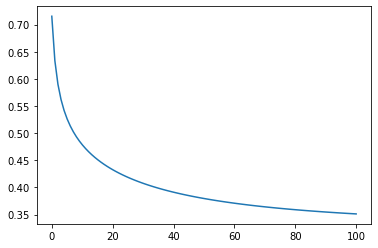

In [55]:
n = 200
xx, y = make_dataset(n)
np.random.seed(1234)

ww = np.random.rand(4)
lam = 0.001
eta = 0.01

num_update = 100
losses = np.zeros([num_update, 1])
wws_grad = np.zeros([num_update, 4])

opt = 0 #opt = 0 is grad,  opt = 1 is newton
for i in range(num_update):
    ww = optimizer(opt, xx, y, ww, lam, eta)
    loss = J(xx, y, ww, lam)
    losses[i] = loss
    wws_grad[i] = ww
#     print(loss)

# print(losses)
wwhat_grad = ww
num = np.linspace(0, num_update, num_update)
import matplotlib.pyplot as plt
plt.plot(num, losses, label="test")

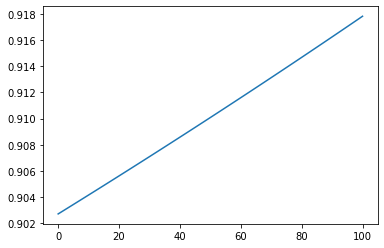

In [66]:
n = 200
xx, y = make_dataset(n)
np.random.seed(1234)

ww = np.random.rand(4)
lam = 0.001
eta = 0.0001

num_update = 100
losses = np.zeros([num_update, 1])
wws_newton = np.zeros([num_update, 4])

opt = 1 #opt = 0 is grad,  opt = 1 is newton
for i in range(num_update):
    ww = optimizer(opt, xx, y, ww, lam, eta)
    loss = J(xx, y, ww, lam)
    losses[i] = loss
    wws_newton[i] = ww
#     print(loss)
# print(losses)
wwhat_newton = ww
num = np.linspace(0, num_update, num_update)
import matplotlib.pyplot as plt
plt.plot(num, losses, label="test")

In [57]:
xx[0].shape
ww.shape
print(xx[0].T)
print(np.dot(xx[0], ww), xx[0].T*ww)
print(xx[0].T.shape)

[ 0.83992742 -0.68222218 -0.67060723  0.90561653]
0.13435732510177542 [ 0.15150782 -0.44150986 -0.31538689  0.73974626]
(4,)


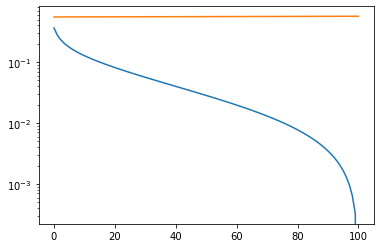

In [77]:
Jwwhat_grad = J(xx, y, wwhat_grad, lam)
Jwwhat_newton = J(xx, y, wwhat_grad, lam)

history_grad = np.zeros([num_update, 1])
history_newton = np.zeros([num_update, 1])

# print(history_newton)
for i in range(num_update):
    history_grad[i] = abs(J(xx, y, wws_grad[i], lam) - Jwwhat_grad)
    history_newton[i] = abs(J(xx, y, wws_newton[i], lam) - Jwwhat_newton)

num = np.linspace(0, num_update, num_update)
import matplotlib.pyplot as plt
plt.yscale('log')
plt.plot(num, history_grad, label="test")
plt.plot(num, history_newton, label="test")

In [86]:
#dataset V
import numpy as np
n = 200
x = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[2, -1, 0.5],
             [-3, 2, 1],
             [1, 2, 3]])

print([x[:, 0:1], np.ones([n, 1])] * W.T)
# print(max([x[:, 0:1], np.ones([n, 1])] * W.T + 0.5 * np.random.rand(n, 3)))
# [maxlogit, y] = max([x(:, 1:2), np.ones([n, 1])] * W + 0.5 * np.random.rand(n, 3))

ValueError: operands could not be broadcast together with shapes (2,200,1) (3,3) 

# problem2

In [8]:
import numpy as np

In [9]:
def problem2_loss_function(AA, w, mm, lam):
    return (ww-mm).reshape(2, 1) * AA * (ww-mm) + lam * np.sum(abs(ww))

In [87]:
# 微分可能な方をf(x), 不可能な方をg(x)とおく
def f(ww, uu, A):
    return np.dot((ww - uu), A*(ww - uu))

def g(ww, lam):
    return lam * np.sum(abs(ww))



In [ ]:
def f_bibun(ww):
    w0 = w[0]
    w1 = w[1]
    return 3 * (w0 - 1) ** 2 + (w0 - 1)(w1 - 2) + (w1-2) ** 2
